<a href="https://colab.research.google.com/github/u-khan902/codsoftProjects/blob/main/SrockmarketprdictionUsingLstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-datareader

In [2]:
!pip install --upgrade pandas_datareader

In [3]:
!pip install yfinance

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta,date
import plotly.graph_objects as go
import yfinance as yf
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [5]:
today = date.today()
d1  = today.strftime('%y-%m-%d')
end_date = d1
d2 = date.today()-timedelta(days = 365)
d2  = d2.strftime('%y-%m-%d')
start_date = d2

In [6]:

df = yf.download('GOOGL', start = '2022-08-19', end = '2023-08-19', progress =False)

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-14,129.389999,131.369995,128.960007,131.330002,131.330002,24695600
2023-08-15,131.100006,131.419998,129.279999,129.779999,129.779999,19770700
2023-08-16,128.699997,130.279999,127.870003,128.699997,128.699997,25216100
2023-08-17,129.800003,131.990005,129.289993,129.919998,129.919998,33446300
2023-08-18,128.509995,129.250000,126.379997,127.459999,127.459999,30491300


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-19 to 2023-08-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [9]:
df=df.reset_index()

In [10]:
dff=df[['Date', 'Close']]

In [11]:
dff.head()

,Date,Close
0,2022-08-19,117.209999
1,2022-08-22,114.239998
2,2022-08-23,113.860001
3,2022-08-24,113.690002
4,2022-08-25,116.650002


In [12]:
fig=px.line(dff, x='Date', y='Close')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [13]:
dff.head()

,Date,Close
0,2022-08-19,117.209999
1,2022-08-22,114.239998
2,2022-08-23,113.860001
3,2022-08-24,113.690002
4,2022-08-25,116.650002


In [14]:
fig = px.line(df, x='Date', y = df.columns)
fig.show()

In [15]:
#lets check weather your data is staionary hai or not
def check_stationarity(df):
  result = adfuller(df)
  print('ADF statistic ::',result[0])
  print('p_value ::',result[1])

  if result[1]<=0.05:
    print('staionary')
  else:
    print('not stationary')

In [16]:
check_stationarity(df['Close'])

ADF statistic :: -1.0354392917942057
p_value :: 0.7401202442146946
not stationary


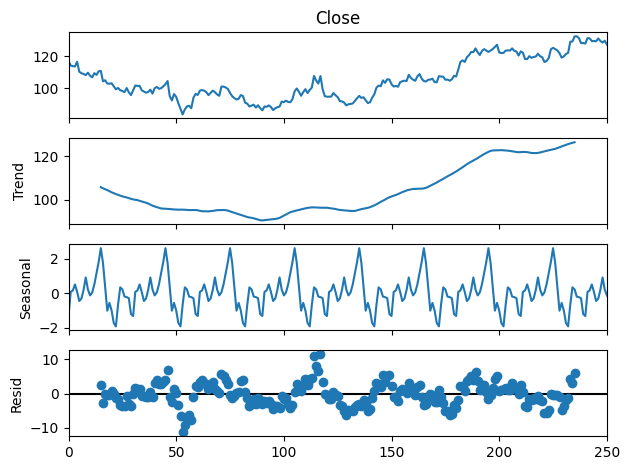

In [17]:
#decompose
import matplotlib.pyplot as plt
decompose = seasonal_decompose(df['Close'], model = 'additive', period=30)
decompose.plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

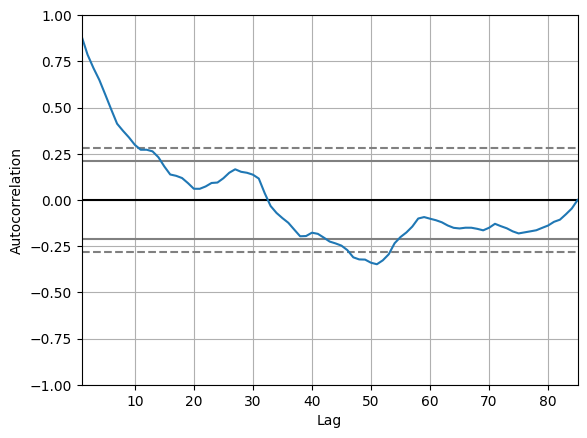

In [18]:
df_in = df.set_index('Date')

pd.plotting.autocorrelation_plot(df_in['2022-08-19':'2022-12-19']['Close'])

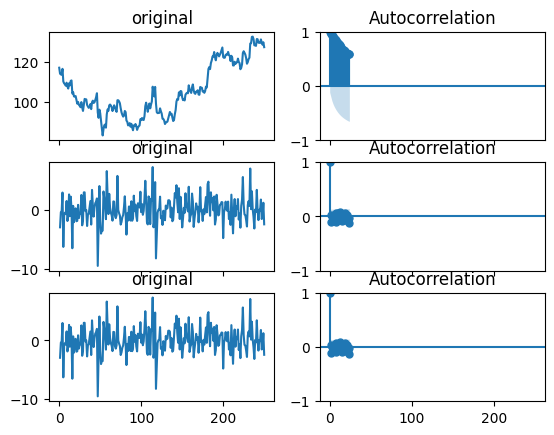

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df['Close']);axes[0,0].set_title('original')
plot_acf(df['Close'],ax =axes[0,1])

axes[1,0].plot(df['Close'].diff());axes[1,0].set_title('original')
plot_acf(df['Close'].diff().dropna(),ax =axes[1,1])

axes[2,0].plot(df['Close'].diff());axes[2,0].set_title('original')
plot_acf(df['Close'].diff().dropna(),ax =axes[2,1])

plt.show()

In [20]:
d=1

In [21]:
#lets find p value


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

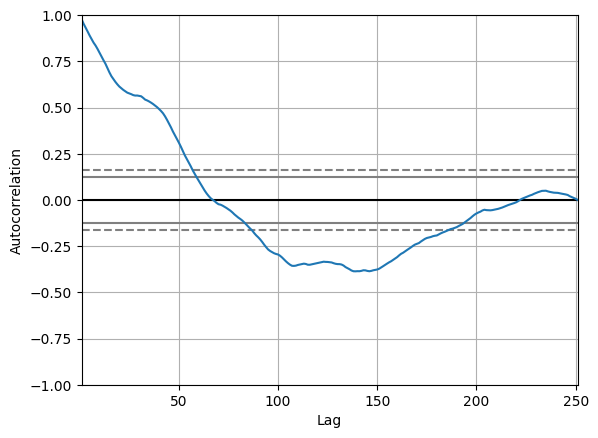

In [22]:
pd.plotting.autocorrelation_plot(df['Close'])

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

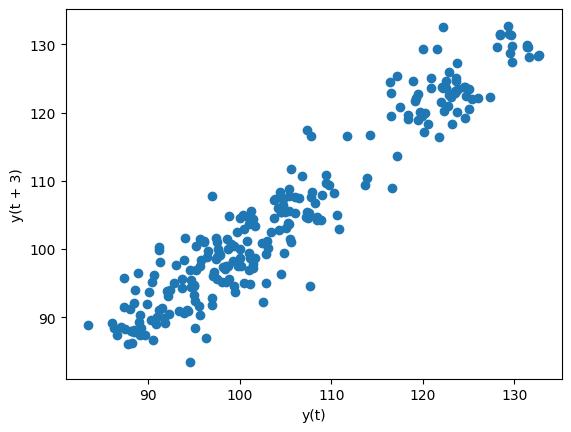

In [23]:
pd.plotting.lag_plot(df['Close'], lag = 3)

In [24]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))

In [25]:
x_acf

,0
0,1.000000
1,0.977147
2,0.952719
3,0.932444
4,0.911398
5,0.889920
6,0.870007
7,0.851206
8,0.835591
9,0.817066


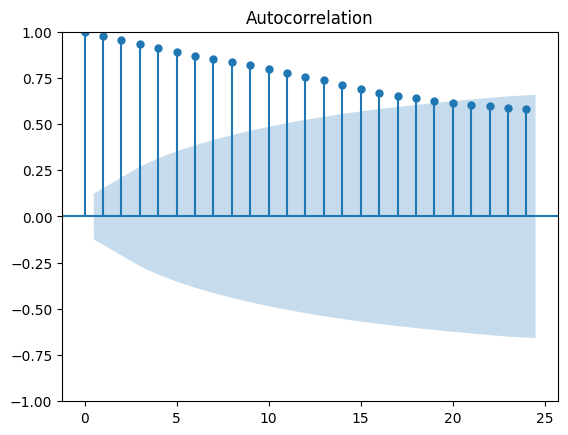

In [26]:
plot_acf(df['Close'], alpha = 0.05)
plt.show()

In [27]:
p=3

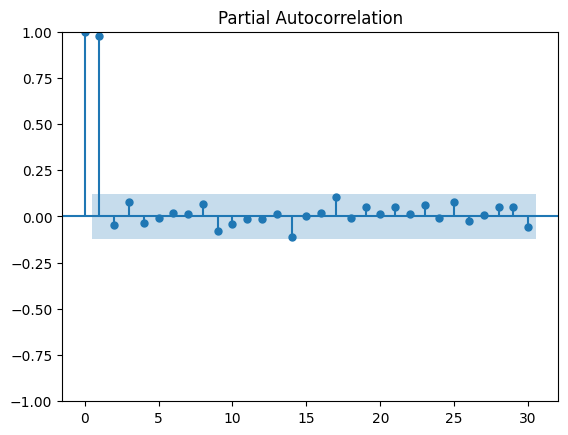

In [28]:
#Let find Q
plot_pacf(df['Close'], lags=30, alpha = 0.05)
plt.show()

In [33]:
# Assuming 'df' is your DataFrame with a 'Close' column containing time series data
data = df['Close']

# Calculate autocorrelation function
acf_values = acf(data)

# Specify the lag value 'q' as 20
lag_q = 2

# Find the autocorrelation value at lag 20
q_value = acf_values[lag_q]

print(f"The q value at lag {lag_q} is: {q_value}")
acf_values

The q value at lag 2 is: 0.9527186767467023


array([1.        , 0.97714699, 0.95271868, 0.93244394, 0.91139805,
       0.88991987, 0.87000678, 0.85120551, 0.83559135, 0.81706621,
       0.79636503, 0.77609798, 0.75602524, 0.73671835, 0.71325215,
       0.68997852, 0.66948075, 0.65423375, 0.63876189, 0.62532621,
       0.61337184, 0.6043389 , 0.59526916, 0.58808887])

In [41]:
q=2

In [42]:
print(f'(p={p},d={d}, q={q})')

(p=3,d=1, q=2)


In [43]:
!pip install pmdarima

In [44]:
from pmdarima.arima import auto_arima

In [45]:
model = auto_arima(df['Close'], start_P=1, start_q=1, max_p = 3, max_q = 1, m=12, start_p = 0 , seasonal=True, d=1,D=1, trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1249.831, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1200.296, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1251.830, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1162.550, Time=0.83 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1160.574, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1198.389, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1162.541, Time=1.39 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1163.196, Time=2.69 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1162.3

In [46]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -577.287
Date:                            Fri, 24 May 2024   AIC                           1160.574
Time:                                    05:31:18   BIC                           1170.991
Sample:                                         0   HQIC                          1164.772
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6430      0.051    -12.720      0.000      -0.742      -0.544
ar.S.L24      -0.4100      0.056   

In [47]:
modell = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)

In [48]:
print(modell.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -561.645
Date:                Fri, 24 May 2024   AIC                           1125.291
Time:                        05:31:20   BIC                           1128.812
Sample:                             0   HQIC                          1126.708
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.2346      0.331     15.835      0.000       4.587       5.882
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                43.16
Prob(Q):                              0.58   Pr

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(df['Close'], order=(p, d, q))
model2 = model2.fit()
print(model2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -556.831
Date:                Fri, 24 May 2024   AIC                           1125.661
Time:                        05:34:52   BIC                           1146.790
Sample:                             0   HQIC                          1134.165
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6958      0.781     -0.891      0.373      -2.226       0.835
ar.L2          0.1352      0.722      0.187      0.851      -1.279       1.550
ar.L3         -0.0769      0.068     -1.132      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
forecast = model2.predict(len(df['Close']), len(df['Close'])+30)
forecast.shape

(31,)

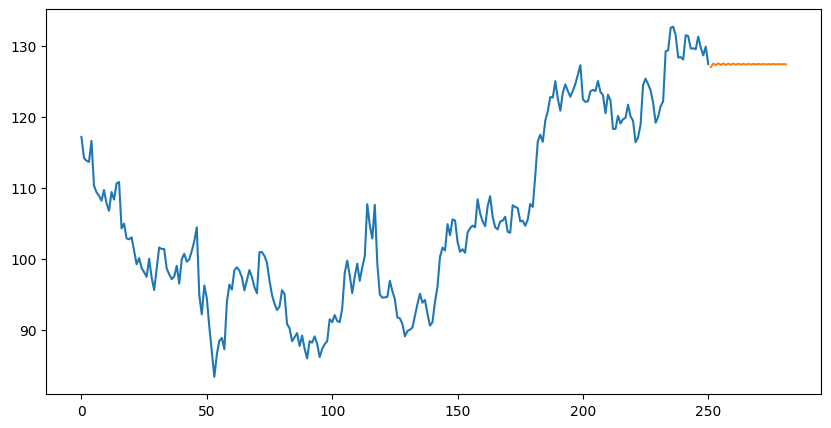

In [59]:
plt.figure(figsize = (10,5))
plt.plot(df['Close'], label = 'Actual')
plt.plot(forecast, label = 'predict')

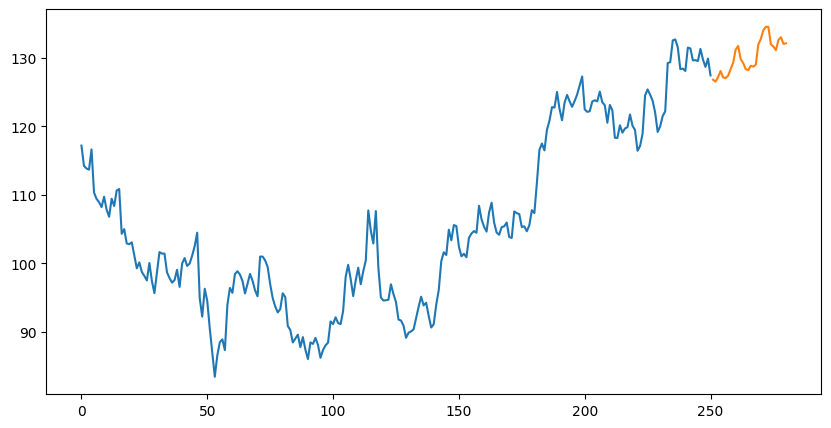

In [64]:
prediction = model.predict(n_periods =30)
plt.figure(figsize = (10,5))
plt.plot(df['Close'], label = 'Actual')
plt.plot(prediction, label = 'predict')

In [67]:
import statsmodels.api as sm
import warnings

In [68]:
p

3

In [69]:
model3 = sm.tsa.statespace.SARIMAX(df['Close'], order=(p,d,q), seasonal_order=(p,d,q,12))

In [70]:
model3 = model3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [76]:
print(model3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -547.725
Date:                            Fri, 24 May 2024   AIC                           1117.451
Time:                                    06:43:58   BIC                           1155.646
Sample:                                         0   HQIC                          1132.844
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1716      1.476      0.116      0.907      -2.722       3.065
ar.L2          0.2592      0.534   

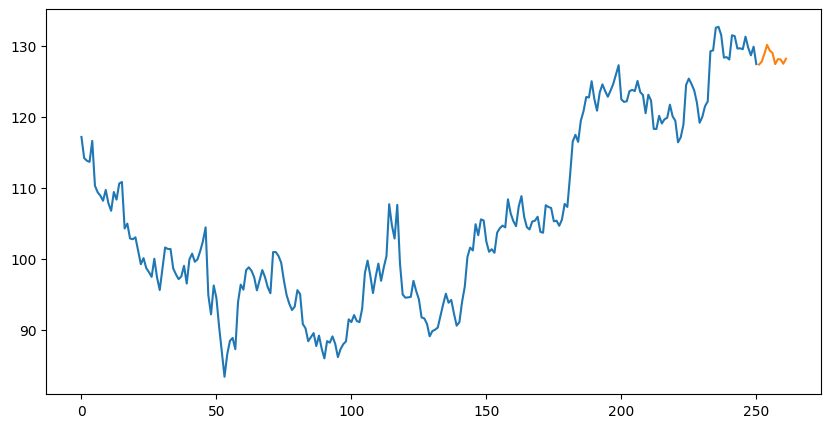

In [81]:
pred = model3.predict(start =len(df['Close']), end=len(df['Close'])+10 )
plt.figure(figsize = (10,5))
plt.plot(df['Close'], label = 'Actual')
plt.plot(pred, label = 'predict')